In [ ]:
#objective: Predict acceptibility of a car

In [1]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load data
df = pd.read_table('../datasets/car.data', sep=",", header=None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','class']

In [3]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
#get shape
df.shape

(1728, 7)

In [5]:
#get descriptive statistics
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,4,4,small,low,unacc
freq,432,432,432,576,576,576,1210


In [6]:
#recode class
cleanup_nums = {"class":{"unacc":1, "acc":2, "good":3, "v-good":4,"vgood":4}}
#unacc: unacceptible, acc: acceptible, good: good,   v-good: very good
df.replace(cleanup_nums, inplace=True)

In [7]:
#one hot encode everything other than class
df_buying = pd.get_dummies(df.buying)
df_maint = pd.get_dummies(df.maint)
df_doors = pd.get_dummies(df.doors)
df_persons = pd.get_dummies(df.persons)
df_lugboot = pd.get_dummies(df.lug_boot)
df_safety = pd.get_dummies(df.safety)

In [8]:
#combine data
df_new = pd.concat([df_buying,df_maint,df_doors,df_persons,df_lugboot,df_safety, df['class']],axis=1) 

In [9]:
df_new.head()

,high,low,med,vhigh,high,low,med,vhigh,2,3,...,2,4,more,big,med,small,high,low,med,class
0,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,1
2,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,1
3,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,1
4,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,1


In [10]:
df['class'].describe()

count    1728.000000
mean        1.414931
std         0.740700
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: class, dtype: float64

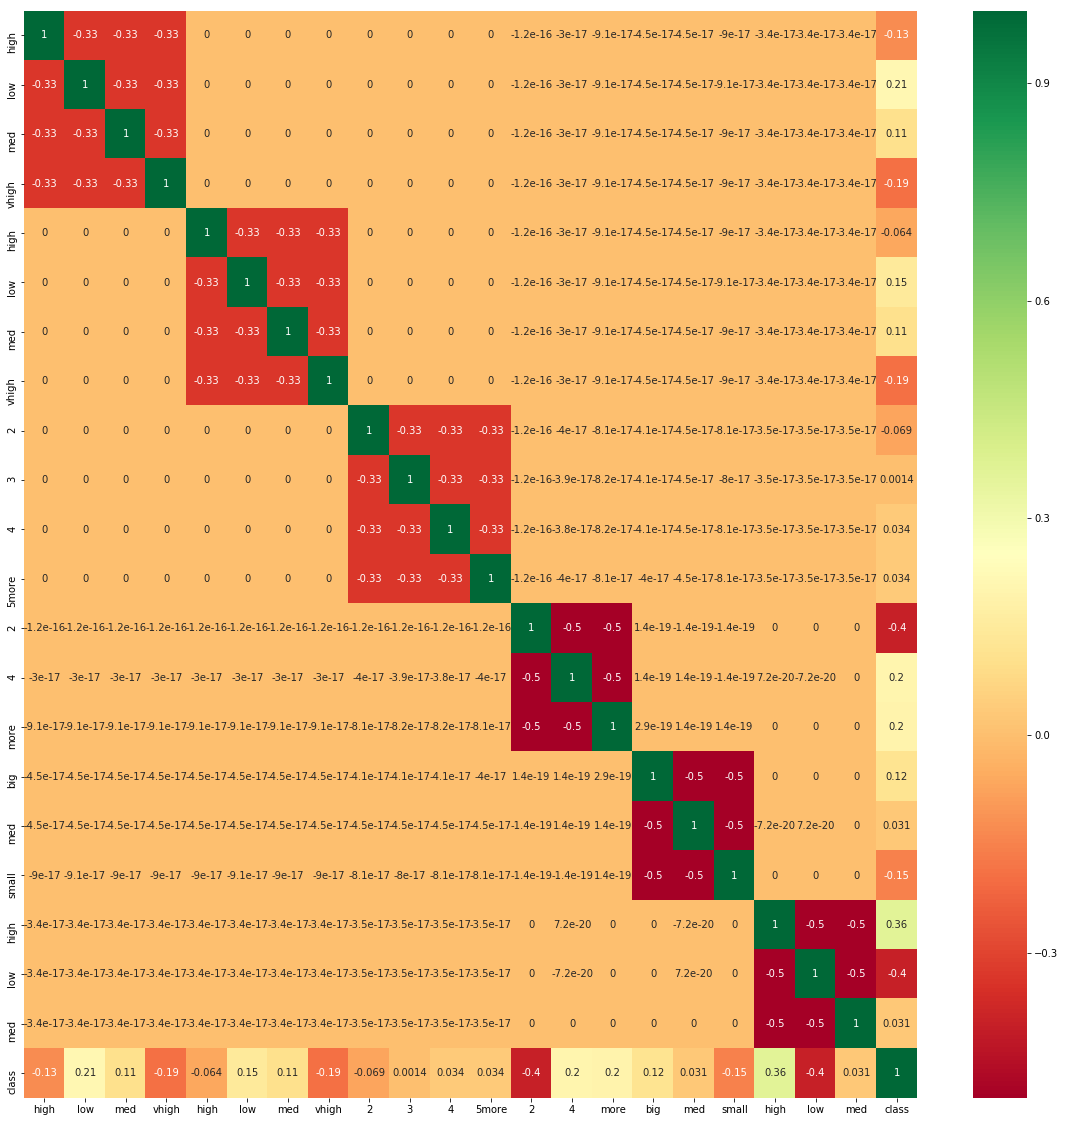

In [11]:
#correlation
x = df_new.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [15]:
#split data into train and test
X = df_new.drop('class', axis=1)
y = df_new['class']
#y=y.astype('int')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [19]:
y_train.astype(str).astype(int)
#y_test.astype(str).astype(int)

142     1
1026    1
537     1
1298    1
1296    1
1713    1
1057    1
1210    2
547     1
325     1
198     1
767     2
478     1
335     2
159     1
227     2
446     1
790     1
779     2
1198    2
1204    3
1353    1
1384    1
955     1
1421    4
1253    3
1449    1
331     1
427     2
289     1
       ..
1001    1
1239    1
580     1
562     1
398     2
668     1
1514    1
252     1
907     2
468     1
914     2
357     1
1278    1
1300    1
1202    3
1305    1
1414    2
508     1
749     2
1607    4
129     1
144     1
960     1
847     1
1669    3
715     2
905     2
1096    2
235     1
1061    1
Name: class, Length: 1296, dtype: int64

KNN: 0.797930 (0.105490)
CART: 0.876170 (0.081169)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

SVM: 0.792744 (0.099095)


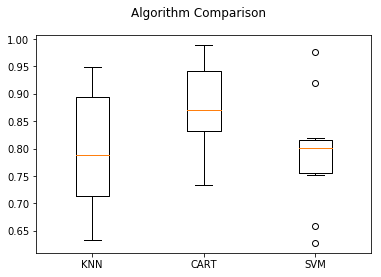

In [23]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#perform classification
array = df_new.values
X = array[:,0:21]
Y = array[:,21]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [24]:
#use rf and others
#try random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)
random_forest.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

0.9328703703703703

In [25]:
#perform on test data
model = random_forest.fit(X_train, y_train)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [26]:
#perform confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["1", "2","3","4"],
    index=["1", "2","3","4"]
)

,1,2,3,4
1,300,10,0,0
2,8,79,1,0
3,0,6,12,0
4,0,2,2,12
